5947 nodes, 8476 edges.
900 nodes, 8476 edges.


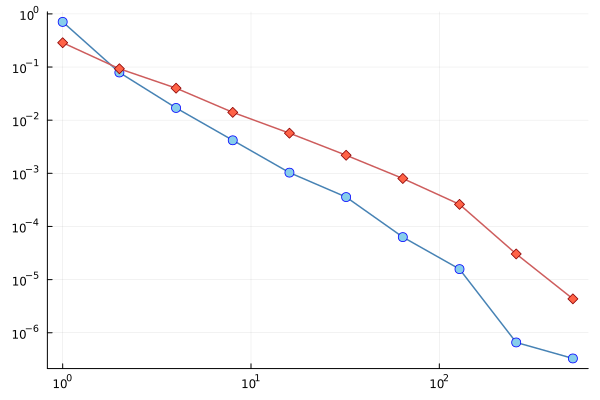

In [6]:
include("../icrp.jl")
include("../icrp_plots.jl")
include("../utils.jl")
using Serialization

In, coag_In, params_true = deserialize("synthetic.data")
println("$(length(In.nodes)) nodes, $(length(In.edge_lengths)) edges.")
println("$(length(coag_In.nodes)) nodes, $(length(coag_In.edge_lengths)) edges.")
plot_fof(In.degrees; colorset="blue")
plot_fof(coag_In.degrees; colorset="red", redraw=true)

In [27]:
num_chains = 3
chains = Vector{ICRPChain}(undef, 0)
coag_chains = Vector{ICRPChain}(undef, 0)
preds = Vector{ICRPPred}(undef, 0)
coag_preds = Vector{ICRPPred}(undef, 0)
for i in 1:num_chains
    chain, pred, coag_chain, coag_pred = deserialize("results/icrp/run$i.data")
    push!(chains, chain)
    push!(coag_chains, coag_chain)
    push!(preds, pred)
    push!(coag_preds, coag_pred)
end

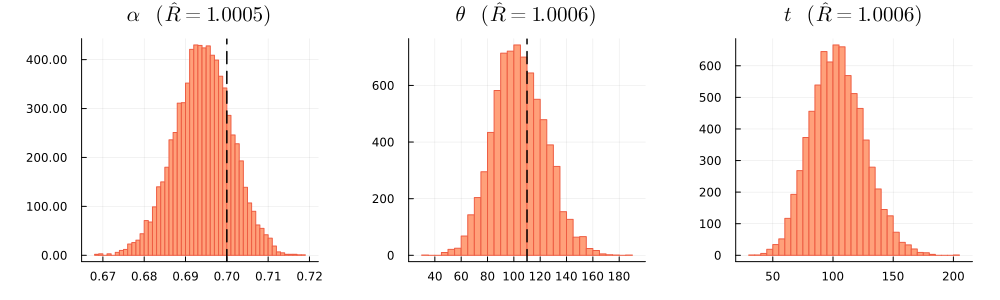

In [28]:
plot_chain(chains; true_vals=Dict{String,Float64}("α"=>params_true["α"], "θ"=>params_true["θ"]+params_true["m"]))

Number of nodes RMSE: 575.2387
Number of edges RMSE: 92.3734
Degree dist average KS: 0.0110+-0.0055


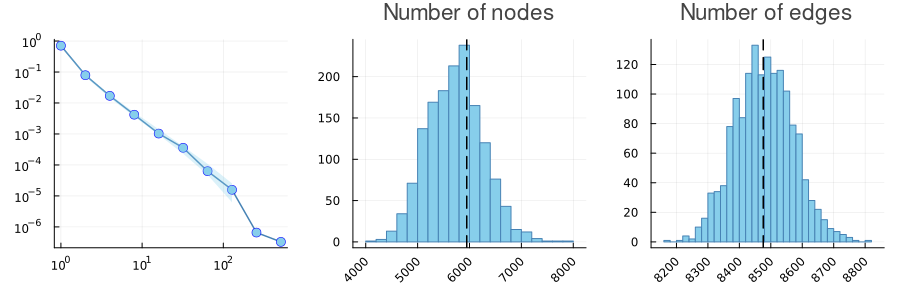

In [23]:
plot_predictions(In, preds)

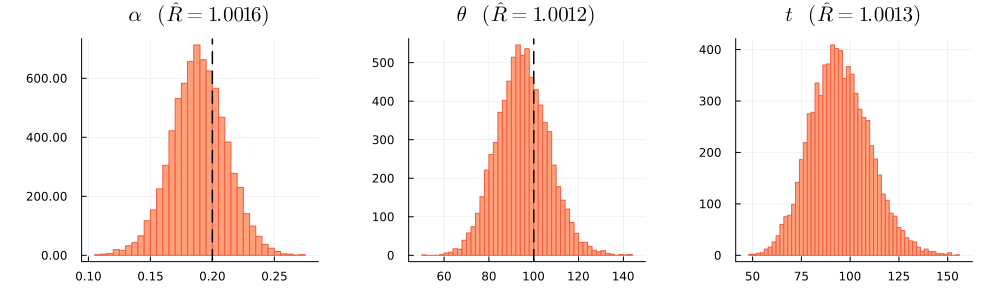

In [25]:
plot_chain(coag_chains; true_vals=Dict{String, Float64}("α"=>params_true["β"], "θ"=>params_true["θ"]))

Number of nodes RMSE: 139.7501
Number of edges RMSE: 95.7380
Degree dist average KS: 0.0811+-0.0476


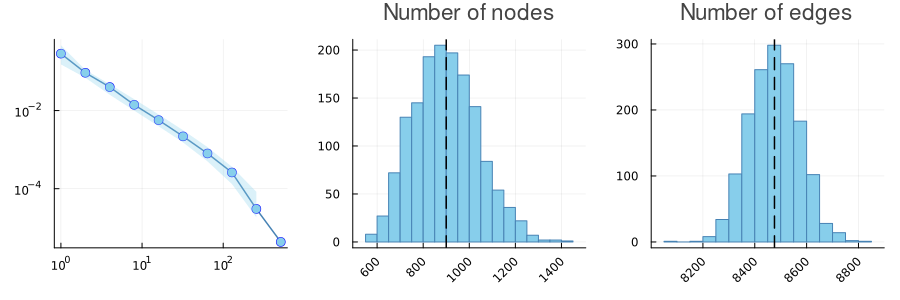

In [26]:
plot_predictions(coag_In, coag_preds)